In [3]:
import pandas as pd
import matplotlib.pyplot as plt

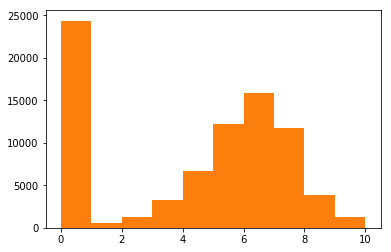

In [5]:
games = pd.read_csv('games.csv', low_memory=False)
plt.hist(games["average_rating"])
plt.show()

In [6]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

In [7]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
good_columns = games._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

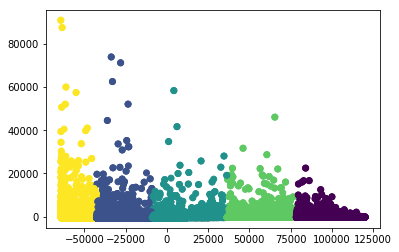

In [8]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [9]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [10]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [11]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

1.8239281903519868

In [14]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4144642407044481